In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [27]:
data = pd.read_csv('Documents/cardekho.csv', sep=",")

In [28]:
data.shape

(8128, 12)

In [29]:
data.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [30]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [31]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [32]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 8128


In [33]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка mileage(km/ltr/kg). Тип данных float64. Количество пустых значений 221, 2.72%.
Колонка engine. Тип данных float64. Количество пустых значений 221, 2.72%.
Колонка seats. Тип данных float64. Количество пустых значений 221, 2.72%.


In [34]:
data_num = data[num_cols]
data_num

,mileage(km/ltr/kg),engine,seats
0,23.40,1248.0,5.0
1,21.14,1498.0,5.0
2,17.70,1497.0,5.0
3,23.00,1396.0,5.0
4,16.10,1298.0,5.0
...,...,...,...
8123,18.50,1197.0,5.0
8124,16.80,1493.0,5.0
8125,19.30,1248.0,5.0
8126,23.57,1396.0,5.0


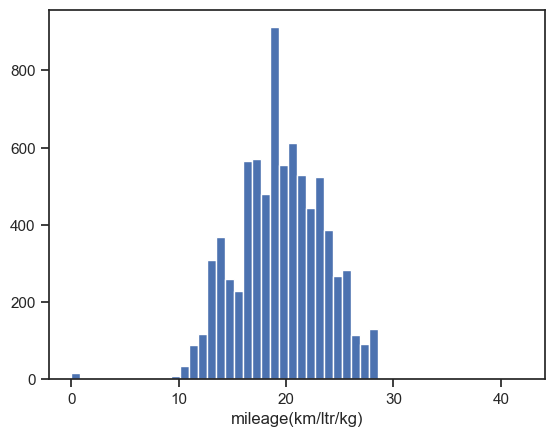

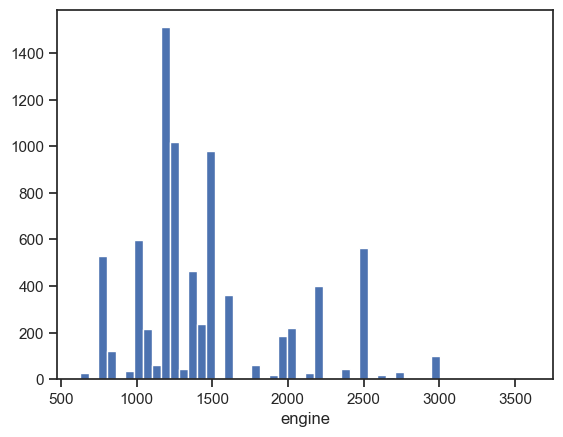

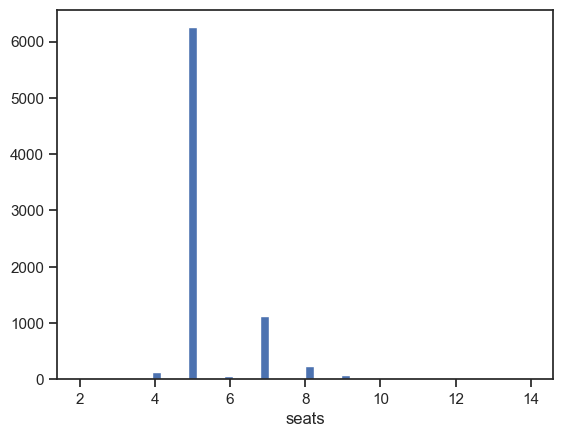

In [35]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [36]:
data_num_engine = data_num[['engine']]
data_num_engine.head()

,engine
0,1248.0
1,1498.0
2,1497.0
3,1396.0
4,1298.0


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [38]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_engine)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [39]:
strategies=['mean', 'median', 'most_frequent']

In [42]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_engine)
    return data_num_imp[mask_missing_values_only]

In [43]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1458.62501581, 1458.62501581,
        1458.62501581, 1458.62501581, 1

In [44]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка max_power. Тип данных object. Количество пустых значений 215, 2.65%.


In [45]:
cat_temp_data = data[['max_power']]
cat_temp_data.head()

,max_power
0,74
1,103.52
2,78
3,90
4,88.2


In [46]:
cat_temp_data['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [57]:
cat_temp_data[cat_temp_data['max_power'].isnull()].shape

(215, 1)

In [61]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='98')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['74'],
       ['103.52'],
       ['78'],
       ...,
       ['73.9'],
       ['70'],
       ['70']], dtype=object)

In [62]:
np.unique(data_imp3)

array([' ', '0', '100', '100.5', '100.57', '100.6', '101', '102', '102.5',
       '103', '103.2', '103.25', '103.26', '103.3', '103.5', '103.52',
       '103.6', '104', '104.5', '104.55', '104.68', '105', '105.3',
       '105.5', '106', '108.45', '108.495', '108.5', '108.6', '108.62',
       '110', '110.4', '110.5', '112', '112.2', '113.4', '113.42', '115',
       '116.3', '116.4', '116.6', '116.9', '117.3', '117.6', '118',
       '118.3', '118.35', '120', '120.69', '120.7', '121', '121.3',
       '121.31', '121.36', '121.4', '122.4', '123.37', '123.7', '125',
       '126.2', '126.24', '126.3', '126.32', '127', '130', '132', '134',
       '134.1', '135.1', '136', '138', '138.03', '138.08', '138.1',
       '139.01', '139.46', '140', '141', '141.1', '142', '143', '144',
       '147.5', '147.51', '147.8', '147.9', '147.94', '148', '148.31',
       '149.5', '150', '152', '152.87', '153.86', '155', '156', '157.7',
       '157.75', '158', '158.8', '160', '160.77', '161', '162', '163.2',
    

In [63]:
data_imp3[data_imp3=='98'].size

215

In [64]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,74
1,103.52
2,78
3,90
4,88.2
...,...
8123,82.85
8124,110
8125,73.9
8126,70


In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [67]:
cat_enc.shape

(8128, 1)

In [68]:
cat_enc_ohe.shape

(8128, 320)

In [69]:
cat_enc_ohe

<8128x320 sparse matrix of type '<class 'numpy.float64'>'
	with 8128 stored elements in Compressed Sparse Row format>

In [70]:
cat_enc_ohe.todense()[0:10]


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
cat_enc.head(10)

,c1
0,74
1,103.52
2,78
3,90
4,88.2
5,81.86
6,57.5
7,37
8,67.1
9,68.1


In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [73]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['selling_price']])

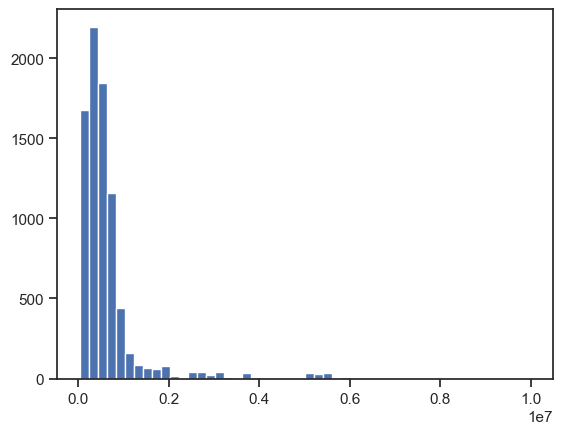

In [74]:
plt.hist(data['selling_price'], 50)
plt.show()

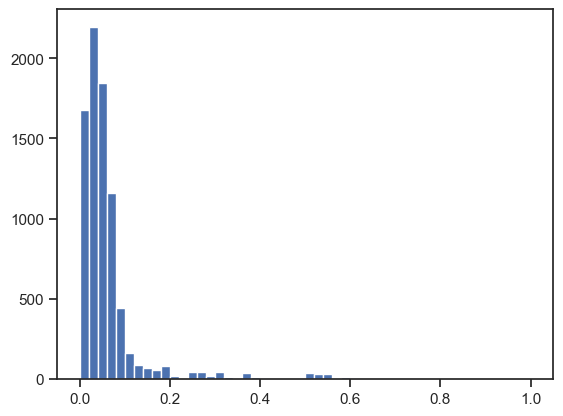

In [75]:
plt.hist(sc1_data, 50)
plt.show()